In [20]:
# Install Kaggle library
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

import pandas as pd
import matplotlib.pyplot as plt



Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
import kaggle

In [3]:
!kaggle competitions download -c survey.csv


403 - Forbidden - Permission 'competitions.participate' was denied


In [13]:
survey_data = pd.read_csv('survey.csv')

In [14]:
df = pd.DataFrame(survey_data)


In [11]:
print(survey_data.head())
print(survey_data.info())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [18]:
age_treatment_data = df[['Age', 'treatment']]
grouped_data = age_treatment_data.groupby(['Age', 'treatment']).size().unstack().fillna(0)
print(grouped_data)

treatment       No   Yes
Age                     
-1726          0.0   1.0
-29            1.0   0.0
-1             0.0   1.0
 5             1.0   0.0
 8             0.0   1.0
 11            1.0   0.0
 18            4.0   3.0
 19            5.0   4.0
 20            4.0   2.0
 21            8.0   8.0
 22           10.0  11.0
 23           27.0  24.0
 24           28.0  18.0
 25           26.0  35.0
 26           38.0  37.0
 27           43.0  28.0
 28           32.0  36.0
 29           49.0  36.0
 30           31.0  32.0
 31           35.0  32.0
 32           41.0  41.0
 33           31.0  39.0
 34           35.0  30.0
 35           25.0  30.0
 36           18.0  19.0
 37           22.0  21.0
 38           16.0  23.0
 39           15.0  18.0
 40           15.0  18.0
 41            6.0  15.0
 42            9.0  11.0
 43           14.0  14.0
 44            5.0   6.0
 45            4.0   8.0
 46            3.0   9.0
 47            1.0   1.0
 48            4.0   2.0
 49            1.0   3.0


In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [19]:
print(df.head())
print(df.info())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

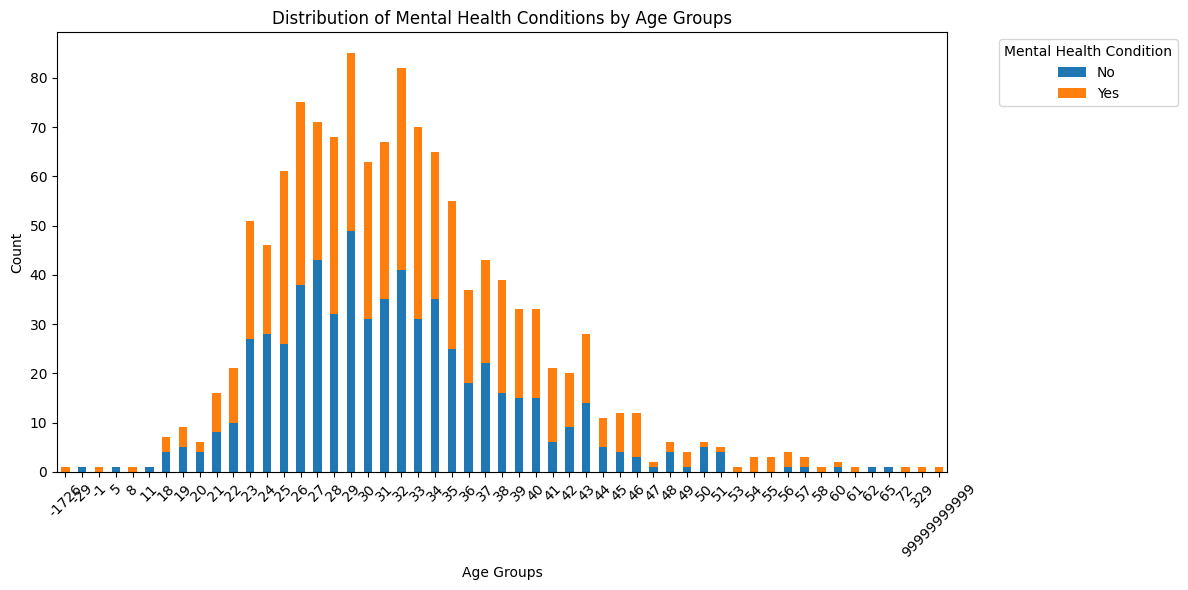

In [22]:
#Q1
age_treatment_data = df[['Age', 'treatment']]
grouped_data_age = age_treatment_data.groupby(['Age', 'treatment']).size().unstack().fillna(0)
grouped_data_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Mental Health Conditions by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mental Health conditions are more important in groups aged of 23 to 46 years old.

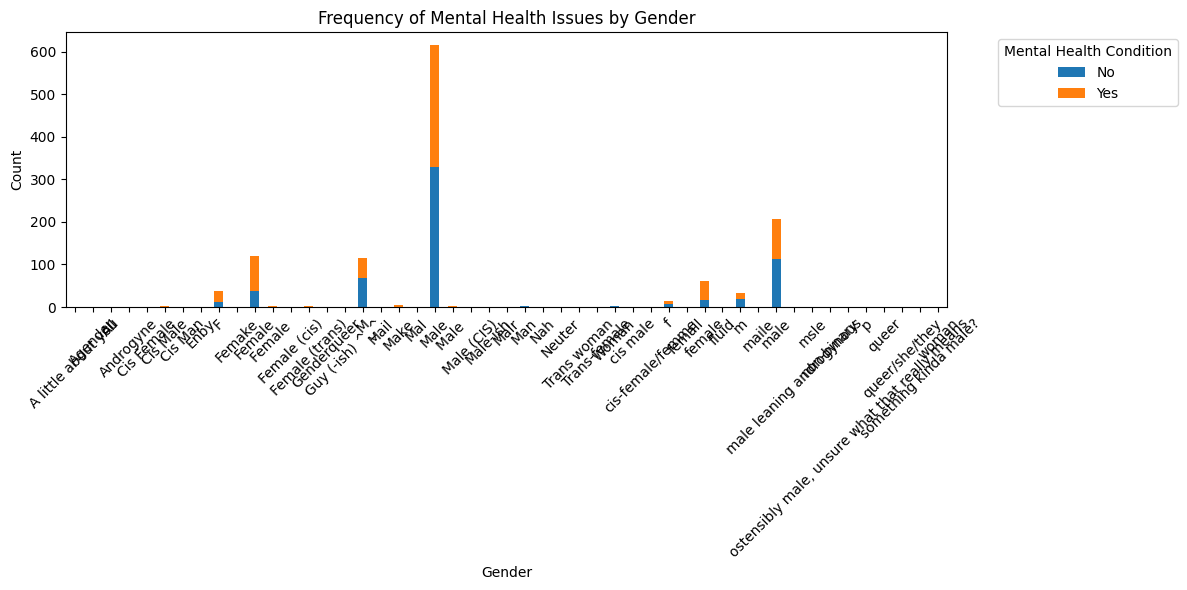

In [23]:
# Question 2
gender_treatment_data = df[['Gender', 'treatment']]
grouped_data_gender = gender_treatment_data.groupby(['Gender', 'treatment']).size().unstack().fillna(0)
grouped_data_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frequency of Mental Health Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#3 : Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.
country_treatment_data = df[['Country', 'treatment']]
country_counts = country_treatment_data.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)
highest_lowest_countries = country_counts.sum(axis=1).sort_values(ascending=False)
print("Countries with the highest reported rates of mental health issues")
print(highest_lowest_countries.head(5))
print("\nCountries with the lowest reported rates of mental health issues:")
print(highest_lowest_countries.tail(5))

Countries with the highest reported rates of mental health issues
Country
Australia      1.0
Austria        1.0
Mexico         1.0
Moldova        1.0
Netherlands    1.0
dtype: float64

Countries with the lowest reported rates of mental health issues:
Country
Greece      1.0
Hungary     1.0
India       1.0
Ireland     1.0
Zimbabwe    1.0
dtype: float64
